In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

### Загружаем данные

In [2]:
item = 'birds' # Выбрать из поля Item для вашего датасета
package = 'openintro' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head(10)

,opid,operator,atype,remarks,phase_of_flt,ac_mass,num_engs,date,time_of_day,state,height,speed,effect,sky,species,birds_seen,birds_struck
0,AAL,AMERICAN AIRLINES,MD-80,NO DAMAGE,Descent,4.0,2.0,9/30/1990 0:00:00,Night,IL,7000.0,250.0,NaN,No Cloud,UNKNOWN BIRD - MEDIUM,NaN,1
1,USA,US AIRWAYS,FK-28-4000,"2 BIRDS, NO DAMAGE.",Climb,4.0,2.0,11/29/1993 0:00:00,Day,MD,10.0,140.0,None,No Cloud,UNKNOWN BIRD - MEDIUM,2-10,2-10
2,AAL,AMERICAN AIRLINES,B-727-200,NaN,Approach,4.0,3.0,8/13/1993 0:00:00,Day,TN,400.0,140.0,None,Some Cloud,UNKNOWN BIRD - SMALL,2-10,1
3,AAL,AMERICAN AIRLINES,MD-82,NaN,Climb,4.0,2.0,10/7/1993 0:00:00,Day,VA,100.0,200.0,None,Overcast,UNKNOWN BIRD - SMALL,NaN,1
4,AAL,AMERICAN AIRLINES,MD-82,NO DAMAGE,Climb,4.0,2.0,9/25/1993 0:00:00,Day,SC,50.0,170.0,None,Some Cloud,UNKNOWN BIRD - SMALL,2-10,1
5,GFT,GULFSTREAM INTL AIRLINES,BE-99,FLT 714. TIME = 1951Z,Landing Roll,2.0,2.0,9/20/1993 0:00:00,Day,FL,0.0,40.0,None,Some Cloud,HAWKS,NaN,1
6,NWA,NORTHWEST AIRLINES,DC-9,15 MI NE OF OMAHA. NO DAMAGE,En Route,4.0,2.0,8/30/1993 0:00:00,Night,NE,4000.0,230.0,None,Some Cloud,UNKNOWN BIRD,NaN,1
7,PHM,PETROLEUM HELICOPTERS,AEROS 350,"HIT A FLOCK, ASSUME 2-10.",Climb,2.0,1.0,2/14/1991 0:00:00,Day,NaN,100.0,50.0,NaN,No Cloud,GULLS,2-10,2-10
8,AAL,AMERICAN AIRLINES,B-727-200,NaN,Approach,4.0,3.0,5/28/1992 0:00:00,Day,UT,200.0,130.0,None,No Cloud,UNKNOWN BIRD - MEDIUM,NaN,1
9,MTR,METROFLIGHT,BA-31 JETSTR,NO DAMAGE REPTD. TIME = 0042Z,Approach,2.0,2.0,2/29/1992 0:00:00,Dusk,TX,3000.0,NaN,None,NaN,UNKNOWN BIRD,NaN,1


### Далее идет ваше решение

Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Сформулируйте на базе переменных три вида гипотез:
    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
    
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

6) Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму.

7) Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Как их можно использовать?

8) Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннуму пользователю!
    

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

        Коллекция всех столкновений самолетов в дикой природе, о которых сообщалось в Федеральное управление гражданской авиации США в период с 1990 по 1997 год, с подробным описанием обстоятельств столкновения.
    
        Структура данных с 19302 наблюдениями по следующим 17 переменным:
    1. opid - Трехбуквенный идентификационный код эксплуатанта (перевозчика) воздушного судна. 
    2. operator - Имя эксплуатанта воздушного судна. 
    3. atype - Марка и модель самолета. 
    4. remarks - Устные замечания по поводу столкновения. 
    
    5. phase_of_flt - Фаза полета, во время которой произошло столкновение: 
    
            Approach - Заход на посадку;
            Climb - Набор высоты;
            Descent - Снижение;
            En Route - В пути;
            Landing Roll - Приземление;
            Parked - Стоянка;
            Take-off run - Разбег при взлете;
            Taxi - Руление.
    
    6. ac_mass - Масса воздушного судна, классифицированная как: 
    
            2250 кг или менее (1); 
            2251-5700 кг (2); 
            5701-27000 кг (3); 
            27001-272000 кг (4); 
            свыше 272000 кг (5).
    
    7. num_engs - Количество двигателей на самолете. 
    8. date - Дата столкновения (ММ/ДД/ГГГГ).
    
    9. time_of_day - Время суток: 
    
            Dawn - Рассвет;
            Day - День;
            Dusk - Сумерки;
            Night - Ночь.
    
    10. state - Двухбуквенная аббревиатура американского штата, в котором произошло столкновение. 
    11. height - Высота над уровнем земли (в футах).
    12. speed - Воздушная скорость (в узлах).
    
    13. effect - Влияние на полет: 
    
            Aborted Take-off - Прерванный взлет; 
            Engine Shut Down - Выключение двигателя; 
            None - Нет; 
            Other - Прочее; 
            Precautionary Landing - Предупредительная посадка.
    
    14. sky - Тип облачного покрова, если таковой имеется: 
    
            No Cloud - Отсутствие облаков; 
            Overcast - Пасмурно; 
            Some Cloud - Небольшое количество облаков.
    
    15. species - Общее название птиц или других диких животных.
    16. birds_seen - Количество птиц/представителей дикой природы, замеченных пилотом: 1, 2-10, 11-100, более 100. 
    17. birds_struck - Количество пораженных птиц/представителей дикой природы: 0, 1, 2-10, 11-100, более 100. 


    Т.к. мне когда-то давно довелось некоторое время работать инженером по эксплуатации аэродрома, то я кое-что знаю по этой теме. Именно поэтому и был выбран датасет birds. Основная причина столкновения птиц с самолётами - это наличие крупных свалок и полигонов ТБО и ТКО в окрестностях аэродрома. Чем ближе и крупнее полигон к аэродрому, тем выше вероятность столкновения с птицами. Все остальные причины второстепенные. В этом датасете нет данных по указанному критерию, даже приблизительно подходящих переменных нет, только если использовать переменную state и потом гуглить наличие свалок в штате. Можно конечно предположить, что в США нет свалок, но они там есть, поиск и фото в Интернете подтверждают. 
    

In [18]:
df.dtypes

opid             object
operator         object
atype            object
remarks          object
phase_of_flt     object
ac_mass         float64
num_engs        float64
date             object
time_of_day      object
state            object
height          float64
speed           float64
effect           object
sky              object
species          object
birds_seen       object
birds_struck     object
dtype: object

2) Сформулируйте на базе переменных три вида гипотез:
    
    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
        
        Категориальные переменные - это переменные, которые имеют ограниченное количество значений или определённый диапазон значений, представлены в виде каких-то качественных признаков. Количественные - измеряемые числовые величины. 
        В нашем датасете типы переменных: 
            1. opid - категориальная; 
            2. operator - категориальная; 
            3. atype - категориальная; 
            4. remarks - текстовая; 
            5. phase_of_flt - категориальная; 
            6. ac_mass - категориальная; 
            7. num_engs - м.б. категориальной или количественной (числовой); 
            8. date - дата, м.б. категориальной или количественной (числовой), можно использовать группировку, например, по месяцам или годам; 
            9. time_of_day - категориальная; 
            10. state - категориальная; 
            11. height - количественная (числовая); 
            12. speed - количественная (числовая); 
            13. effect - категориальная; 
            14. sky - категориальная; 
            15. species - категориальная; 
            16. birds_seen - категориальная (количество представлено в виде диапазонов); 
            17. birds_struck - категориальная (количество представлено в виде диапазонов). 
        
        Основная переменная в датасете - birds_struck - представлена в виде категориальной переменной. Если будет необходимо преобразовать категориальные значения в количество (число), то сделаем это таким образом: 
            '0'	-> 0 
            '1'	-> 1
            '2-10' -> 5 (примерно среднее значение)
            '11-100' ->	50 (примерно среднее значение)
            'Over 100' -> 100. 
        Метод конечно субъективный, но и пилоты количество поражённых птиц считают примерно также, т.е. приблизительно. 1-2-3 можно посчитать точно, а если стая, то подсчёт упрощённый (до 10, до 100, больше 100). 
        
        
        Гипотезы: 
        
        а1) Предположим, что между переменными time_of_day (время суток) и birds_struck (количество пораженных птиц) существует взаимосвязь. В вечернее время и на рассвете столкновений с птицами нет (или количество столкновений небольшое). 
        
        а2) Также ещё хочется проверить взаимосвязь переменных state (штат) и birds_struck (количество пораженных птиц). Ну это для интереса, протестировать гипотезу о взаимосвязи столкновений с птицами и наличием крупных свалок в штате.  
        Нейро-поиск Яндекса на запрос "Самая большая свалка США" выдаёт результат: 
        1. Свалка Apex Regional в окрестностях Лас-Вегаса, Невада, США, считается самой большой свалкой в стране. Она занимает площадь 890 гектаров и содержит 5 млн тонн мусора. 
        2. Ранее крупнейшей свалкой в США была Пуэнте-Хиллз в Калифорнии. Она возвышалась на 150 метров в высоту и занимала площадь 700 акров (2,8 км²). Но 31 октября 2013 года действие разрешения на эксплуатацию было прекращено, и свалка больше не принимает новый мусор. 
        3. Также до начала 2000-х годов самой большой в мире считалась свалка Freshkills в Нью-Йорке, на западе боро Статен-Айленд. Она занимала площадь 890 гектаров и состояла из четырёх курганов высотой от 30 до 70 метров. 

        
    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
        
        б) Предположим, что между переменными birds_struck (количество пораженных птиц) и date (дата столкновения) существует взаимосвязь. Во время сезонов перелётов птиц количество столкновений увеличивается. 
        
    
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
        
        Здесь сложнее подобрать переменные, числовых переменных в датасете немного, в чистом виде только высота, скорость и количество двигателей. Анализ взаимосвязи этих переменных не будет иметь никакого практического смысла, а искать взаимосвязь между количеством двигателей, высотой и скоростью вообще бестолковое занятие. 
        
        в) В общем, я подумал и решил: 
        Предположим, что между переменными height (высота над уровнем земли) и birds_struck (количество пораженных птиц) существует взаимосвязь. Будем считать количество столкновений на интервалах высот. 
                
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

        а1) Смысл гипотезы заключается в том, что птицы вечером и на рассвете летают меньше. Такое поведение объясняется тем, что в это время Солнце раздражительно светит птицам в глаза, они не любят это время суток. Проверим, подтвердится гипотеза или нет. С практической точки зрения, если гипотеза подтвердится, то можно расписание полётов корректировать на определённое время, например больше планировать вылетов на рассвете или на закате. 
        
        а2) Если подтвердится гипотеза, что в каком-то из штатов (Невада, Калифорния, Нью-Йорк) большое количество столкновений, то значит основная причина - полигон отходов. Что это даст с практической точки зрения? Нам - ничего не даст) Американцам - не знаю. У них даже мусор - это бизнес. Надо либо свалку переносить (отходы утилизировать), либо аэродромы переносить подальше от свалок. 
        
        б) Смысл гипотезы заключается в том, чтобы проверить (определить) влияние сезонов перелётов птиц на их столкновение с самолётами. Т.е., предположительно, в сезоны перелётов птиц (весна, осень, определённые месяцы) количество столкновений увеличивается. С практической точки зрения полученные выводы можно учитывать при составлении расписаний полётов, чтобы уменьшить количество рейсов в эти периоды повышенной опасности. 
        
        в) Смысл гипотезы заключается в том, чтобы определить потенциально опасные высоты (по авиационному - эшелоны) на которых количество столкновений больше, чем на других высотах. С практической точки зрения полученные выводы могут учитываться при управлении воздушным судном, например, можно быстрее пересекать потенциально опасные эшелоны, если о них известно заранее. 


4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи
5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

In [3]:
# Проверим, есть ли в выбранных переменных датасета пропуски (NaN)

df[['time_of_day', 'birds_struck', 'state', 'date', 'height']].isna().sum() 

time_of_day     2077
birds_struck      39
state            871
date               0
height          3193
dtype: int64

In [ ]:
# Пропуски есть, много пропусков 

# time_of_day (время суток) 
# Почему не указано время суток? Пилот потерялся во времени!? Сломались часы!? В общем, непонятно! 
# Мы собираемся анализировать столкновения в зависимости от времени суток. 
# Поэтому, если время суток не указано - будем удалять строки (только в датафрейме df1). 

# birds_struck (количество пораженных птиц) 
# Здесь очевидно - если нет значения, то количество поражённых птиц = 0. Можно заполнить пропуски нулями ('0'). 
# Но если birds_struck = '0', то тогда столкновений не было и такие случаи нас не очень интересуют. 
# Можно удалить строки, можно оставить, количество пропусков незначительное. 

# state (штат)
# Если не указан штат (а он нам нужен в df2), то ничем этот пропуск не заполнить. 
# Будем удалять строки с пропусками (только в датафрейме df2). 

# date (дата) - пропусков нет. 

# height (высота)
# Почему по высоте так много пропусков (3193)? Долго думал, заполнять средним значением или нет. 
# В результате пришёл к выводу, что средним значением заполнять нельзя, т.к. в df4 нам нужна 
# более-менее точная высота. Будем удалять строки с пропусками (только в датафрейме df4). 


In [ ]:
# Надо ещё подумать исключать столкновения с наземными животными или нет. 

In [4]:
# Столкновения с собаками - 4. 
df[df['species'].str.contains(r'DOMESTIC DOG', na=False) & 
    (df['birds_struck'].notnull()) & 
    (df['birds_struck'] != '0')]

,opid,operator,atype,remarks,phase_of_flt,ac_mass,num_engs,date,time_of_day,state,height,speed,effect,sky,species,birds_seen,birds_struck
6096,EGF,AMERICAN EAGLE AIRLINES,SAAB-340,FLG 511 ABRTD T/O AFTER HITTING A DOG. NO DAM...,Take-off run,3.0,2.0,11/21/1994 0:00:00,Night,MS,0.0,NaN,Aborted Take-off,NaN,DOMESTIC DOG,NaN,1
8922,UAL,UNITED AIRLINES,A-320,FLT 239 STRUCK DOG (AKITA) WHICH HAD GOTTEN AW...,Landing Roll,4.0,2.0,7/15/1995 0:00:00,Night,CA,0.0,NaN,None,NaN,DOMESTIC DOG,NaN,1
12276,AAL,AMERICAN AIRLINES,MD-80,FLT 1692 STRUCK A DOG ON DEPT RWY. A/C CONTD T...,Take-off run,4.0,2.0,7/1/1992 0:00:00,Dusk,IL,0.0,NaN,None,NaN,DOMESTIC DOG,NaN,1
15439,ASA,ALASKA AIRLINES,MD-80,FLT 601 STRUCK A DOG ON DEPTR. BODY FOUND INTA...,Take-off run,4.0,2.0,12/14/1996 0:00:00,Day,NV,0.0,NaN,NaN,NaN,DOMESTIC DOG,NaN,1


In [5]:
# Столкновения с оленями - 268 случаев. И такое бывает, если аэродром не имеет ограждения по периметру. 
df[df['species'].str.contains(r'WHITE-TAILED DEER', na=False) & 
   (df['birds_struck'].notnull()) & 
   (df['birds_struck'] != '0')].head(10)

,opid,operator,atype,remarks,phase_of_flt,ac_mass,num_engs,date,time_of_day,state,height,speed,effect,sky,species,birds_seen,birds_struck
236,USA,US AIRWAYS,DHC8 DASH 8,"NO DAMAGE TO AC, BUT THE DEER WAS FATALLY INJU...",Landing Roll,3.0,2.0,11/15/1992 0:00:00,Night,PA,0.0,NaN,None,NaN,WHITE-TAILED DEER,NaN,1
443,CDL,CCAIR,BA-31 JETSTR,FLT 5137. A/C DEPTD & REPTD STRIKING A DEER. P...,Take-off run,2.0,2.0,10/2/1993 0:00:00,Dawn,WV,0.0,NaN,Precautionary Landing,NaN,WHITE-TAILED DEER,NaN,1
835,USA,US AIRWAYS,B-737,"FLT 651, STRUCK A DEER W/ L MAIN GEAR UPON LAN...",Landing Roll,4.0,2.0,12/11/1991 0:00:00,Night,PA,0.0,NaN,None,NaN,WHITE-TAILED DEER,NaN,1
866,PVT,PRIVATELY OWNED,C-172,TIME = 0110Z. NO INJURIES. DAMAGE TO REAR HO...,Landing Roll,1.0,1.0,7/28/1992 0:00:00,Night,ME,0.0,NaN,NaN,NaN,WHITE-TAILED DEER,NaN,1
1207,ABX,ABX AIR (was AIRBORNE EXPRESS),DC-9-30,"FLT 121. TIME =0356Z. A/C CONTD TO ILN, LANDI...",Take-off run,4.0,2.0,9/29/1992 0:00:00,Night,IL,0.0,NaN,NaN,Some Cloud,WHITE-TAILED DEER,2-10,2-10
1222,BUS,BUSINESS,C-152,HIT BUCK ON ROTATION FOR T/O. BENT PROP'S & D...,Take-off run,1.0,1.0,10/2/1990 0:00:00,Night,OH,0.0,53.0,Precautionary Landing,No Cloud,WHITE-TAILED DEER,NaN,1
1325,JIA,PSA AIRLINES,BA-31 JETSTR,FLT 4133 AFTER CLEARING RWY PILOT ADVISED HE H...,Landing Roll,2.0,2.0,4/13/1992 0:00:00,Night,MI,0.0,NaN,Engine Shut Down,Overcast,WHITE-TAILED DEER,NaN,1
1380,BUS,BUSINESS,PA-60 600,"STRUCK A DEER ON DEPT AT 2045 EDT. ON FLY BY,...",Take-off run,2.0,2.0,7/19/1993 0:00:00,Day,CT,0.0,NaN,Precautionary Landing,NaN,WHITE-TAILED DEER,NaN,1
1396,PVT,PRIVATELY OWNED,C-182 SKYLAN,A/C WAS ATTEMPTING T/O ON RY 5/23 WHEN IT STRU...,Take-off run,1.0,1.0,7/23/1993 0:00:00,Day,VA,0.0,NaN,NaN,NaN,WHITE-TAILED DEER,NaN,1
1608,JIA,PSA AIRLINES,BA-31 JETSTR,"TIME =2054 E. NO INJURIES, MINOR DAMAGE TO TH...",Landing Roll,2.0,2.0,3/27/1994 0:00:00,Night,PA,0.0,NaN,None,NaN,WHITE-TAILED DEER,NaN,1


In [6]:
# Посчитаем количество всех инцидентов по названиям птиц и др. диких животных: 
df_species = df.groupby(['species'])['species'].count()
pd.set_option('display.max_rows', None)
df_species

species
AMERICAN ALLIGATOR                  7
AMERICAN AVOCET                     1
AMERICAN BLACK DUCK                 1
AMERICAN COOT                       4
AMERICAN CROW                      71
AMERICAN GOLDEN-PLOVER              4
AMERICAN GOLDFINCH                  5
AMERICAN KESTREL                  164
AMERICAN ROBIN                     83
AMERICAN WIGEON                     2
AMERICAN WOODCOCK                   2
ANHINGA                             3
ARCTIC TERN                         3
ARMADILLO                           7
BALD EAGLE                         22
BANK SWALLOW                        1
BARN OWL                           31
BARN SWALLOW                       45
BARRED OWL                          1
BATS                               20
BELTED KINGFISHER                   2
BLACK VULTURE                       4
BLACK-BELLIED PLOVER                2
BLACK-BILLED MAGPIE                 2
BLACK-CAPPED CHICKADEE              1
BLACK-CROWNED NIGHT-HERON           1
BLAC

In [7]:
# Всего нелетающих животных: 467 (из 19302), т.е. ~2,4%, в основном у нас птицы. 

not_birds = df[(df['species'] == 'AMERICAN ALLIGATOR') | # аллигаторы
   (df['species'] == 'ARMADILLO') | # броненосец
   (df['species'] == 'DOMESTIC CAT') | # кошки
   (df['species'] == 'DOMESTIC DOG') | # собаки
   (df['species'] == 'CANIDS') | # псовые
   (df['species'] == 'CATTLE') | # крупный рогатый скот
   (df['species'] == 'COYOTE') | # койоты
   (df['species'] == 'EASTERN BOX TURTLE') | # черепахи
   (df['species'] == 'EASTERN COTTONTAIL') | # кролики
   (df['species'] == 'FLORIDA SOFT SHELL TURTLE') | # черепахи
   (df['species'] == 'FOXES') | # лисы
   (df['species'] == 'RED FOX') | # лисы
   (df['species'] == 'WHITE-TAILED DEER') | # белохвостые олени
   (df['species'] == 'MULE DEER') | # северные олени
   (df['species'] == 'CARIBOU') | # северные олени
   (df['species'] == 'DEER') | # олени
   (df['species'] == 'MOOSE') | # лоси
   (df['species'] == 'MUSKRAT') | # ондатра
   (df['species'] == 'OPOSSUM') | # опоссум
   (df['species'] == 'RABBITS') | # зайцы
   (df['species'] == 'RACCOON') | # еноты
   (df['species'] == 'RIVER OTTER') | # речная выдра
   (df['species'] == 'STRIPED SKUNK') | # полосатый скунс
   (df['species'] == 'WAPITI (ELK)') | # лоси
   (df['species'] == 'WOODCHUCK') | # лесной сурок
   (df['species'] == 'TURTLES')]['species'].count() # черепахи

print(f'Количество нелетающих животных: {not_birds} (~{round(not_birds*100/19302, 2)}%)')

Количество нелетающих животных: 467 (~2.42%)


In [8]:
# Т.к. в гипотезах нас интересуют только птицы, то удаляем из датафрейма всех нелетающих животных. 
# Для наших гипотез это некорректные данные. 

df.drop(df[(df['species'] == 'AMERICAN ALLIGATOR') | 
           (df['species'] == 'ARMADILLO') | 
           (df['species'] == 'DOMESTIC CAT') | 
           (df['species'] == 'DOMESTIC DOG') | 
           (df['species'] == 'CANIDS') | 
           (df['species'] == 'CATTLE') | 
           (df['species'] == 'COYOTE') | 
           (df['species'] == 'EASTERN BOX TURTLE') | 
           (df['species'] == 'EASTERN COTTONTAIL') | 
           (df['species'] == 'FLORIDA SOFT SHELL TURTLE') | 
           (df['species'] == 'FOXES') | 
           (df['species'] == 'RED FOX') | 
           (df['species'] == 'WHITE-TAILED DEER') | 
           (df['species'] == 'MULE DEER') | 
           (df['species'] == 'CARIBOU') | 
           (df['species'] == 'DEER') | 
           (df['species'] == 'MOOSE') | 
           (df['species'] == 'MUSKRAT') | 
           (df['species'] == 'OPOSSUM') | 
           (df['species'] == 'RABBITS') | 
           (df['species'] == 'RACCOON') | 
           (df['species'] == 'RIVER OTTER') | 
           (df['species'] == 'STRIPED SKUNK') | 
           (df['species'] == 'WAPITI (ELK)') | 
           (df['species'] == 'WOODCHUCK') | 
           (df['species'] == 'TURTLES')]
        .index, inplace = True) 


In [9]:
# Проверяем удалились строки или нет 
df.groupby(['species'])['species'].count()

species
AMERICAN AVOCET                     1
AMERICAN BLACK DUCK                 1
AMERICAN COOT                       4
AMERICAN CROW                      71
AMERICAN GOLDEN-PLOVER              4
AMERICAN GOLDFINCH                  5
AMERICAN KESTREL                  164
AMERICAN ROBIN                     83
AMERICAN WIGEON                     2
AMERICAN WOODCOCK                   2
ANHINGA                             3
ARCTIC TERN                         3
BALD EAGLE                         22
BANK SWALLOW                        1
BARN OWL                           31
BARN SWALLOW                       45
BARRED OWL                          1
BATS                               20
BELTED KINGFISHER                   2
BLACK VULTURE                       4
BLACK-BELLIED PLOVER                2
BLACK-BILLED MAGPIE                 2
BLACK-CAPPED CHICKADEE              1
BLACK-CROWNED NIGHT-HERON           1
BLACKBIRDS                        543
BLUE JAY                            2
BLUE

In [10]:
# Проверим датафрейм на дубликаты
df[df.duplicated()]
# Есть два дубликата 

,opid,operator,atype,remarks,phase_of_flt,ac_mass,num_engs,date,time_of_day,state,height,speed,effect,sky,species,birds_seen,birds_struck
8715,ABX,ABX AIR (was AIRBORNE EXPRESS),DC-9-40,NaN,En Route,4.0,2.0,10/13/1994 0:00:00,Night,NaN,NaN,NaN,None,NaN,UNKNOWN BIRD,NaN,1
14090,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,10/12/1996 0:00:00,NaN,IL,NaN,NaN,NaN,NaN,RING-BILLED GULL,NaN,1


In [11]:
# Удаляем дубликаты 
df = df.drop_duplicates()
df[df.duplicated()]

,opid,operator,atype,remarks,phase_of_flt,ac_mass,num_engs,date,time_of_day,state,height,speed,effect,sky,species,birds_seen,birds_struck


In [12]:
maxSpeed = df['speed'].max() 
maxHeight = df['height'].max() 

print(f'Максимальная скорость столкновения: {int(maxSpeed * 1.852)} км/ч ({int(maxSpeed)} узлов)') 
print(f'Максимальная высота столкновения: {int(maxHeight * 0.3048)} м. ({int(maxHeight)} футов)')

Максимальная скорость столкновения: 740 км/ч (400 узлов)
Максимальная высота столкновения: 9906 м. (32500 футов)


In [14]:
# А вот здесь стало интересно, с какими попугаями можно столкнуться на высоте более 5000 м. 
df[df['height'] > 16400] 
# Тайна осталась не раскрытой - UNKNOWN BIRD. 

,opid,operator,atype,remarks,phase_of_flt,ac_mass,num_engs,date,time_of_day,state,height,speed,effect,sky,species,birds_seen,birds_struck
4976,USA,US AIRWAYS,B-737,"FLT1242 CLT-FAY. WHILE INBOUND TO FAY, STRUCK...",Descent,4.0,2.0,10/5/1992 0:00:00,Night,NC,17000.0,NaN,NaN,NaN,UNKNOWN BIRD,NaN,1
5253,AAL,AMERICAN AIRLINES,MD-80,NO DAMAGE NOTED. AA 216,Climb,4.0,2.0,12/17/1991 0:00:00,Day,CT,17500.0,320.0,None,No Cloud,UNKNOWN BIRD - SMALL,NaN,1
9793,CDL,CCAIR,DHC8 DASH 8,OUTER PANE OF CO-PILOT'S WINDSHIELD CRACKED. N...,En Route,3.0,2.0,12/13/1994 0:00:00,Day,KY,21000.0,230.0,NaN,NaN,UNKNOWN BIRD,NaN,1
13079,AAL,AMERICAN AIRLINES,MD-80 SERIES,NO DAMAGE,Descent,4.0,2.0,9/30/1995 0:00:00,Night,FL,22000.0,300.0,None,No Cloud,UNKNOWN BIRD - MEDIUM,NaN,1
13340,USA,US AIRWAYS,B-737-200,EXTENT OF DAMAGE NOT REPTD.,En Route,4.0,2.0,3/14/1996 0:00:00,Day,VA,22000.0,NaN,None,Some Cloud,UNKNOWN BIRD - MEDIUM,NaN,1
15052,BUS,BUSINESS,A-320,WE HEARD A LOUD BANG & FELT A BUMP NEAR IMPERI...,En Route,4.0,2.0,9/1/1995 0:00:00,NaN,CA,32500.0,NaN,Precautionary Landing,NaN,UNKNOWN BIRD,NaN,1
15830,UAL,UNITED AIRLINES,B-727,EXTENT OF DAMAGE NOT REPTD. A/C FLEW FOR AN HR...,En Route,4.0,3.0,10/11/1996 0:00:00,Day,NaN,25000.0,400.0,Precautionary Landing,Some Cloud,UNKNOWN BIRD,NaN,1
18833,ALO,ALLEGHENYAIRLINES,DHC8 DASH 8,"A/C ENRT TO KBWI STRUCK BIRD, CRACKED WINDSHLD...",En Route,3.0,2.0,3/7/1997 0:00:00,Day,NY,22000.0,NaN,Precautionary Landing,Some Cloud,UNKNOWN BIRD,NaN,1
19151,BUS,BUSINESS,RKWLTRBO 690,NO INJURIES. CRACKED WINDSHLD. INNER LAM OF WI...,En Route,2.0,2.0,2/27/1998 0:00:00,Day,NaN,23000.0,195.0,Other,Some Cloud,UNKNOWN BIRD - LARGE,NaN,1


In [15]:
# Много пропусков в переменной speed, но она у нас нигде не используется, заполнять и удалять не будем. 
df[['speed']].isna().sum() 

speed    6619
dtype: int64

In [ ]:
# Ещё посмотрим на уникальные значения 

In [17]:
df['time_of_day'].unique()

array(['Night', 'Day', 'Dusk', 'Dawn', nan], dtype=object)

In [18]:
df['birds_struck'].unique()

array(['1', '2-10', '11-100', 'Over 100', nan, '0'], dtype=object)

In [19]:
df['state'].unique()

array(['IL', 'MD', 'TN', 'VA', 'SC', 'FL', 'NE', nan, 'UT', 'TX', 'AR',
       'GA', 'NY', 'ID', 'NJ', 'AK', 'LA', 'MS', 'PA', 'CA', 'OH', 'ME',
       'WI', 'MI', 'KY', 'ON', 'CO', 'NC', 'WA', 'MO', 'MA', 'IN', 'DC',
       'HI', 'CT', 'IA', 'AL', 'RI', 'OK', 'NV', 'KS', 'WV', 'MN', 'QC',
       'OR', 'AZ', 'MT', 'NH', 'WY', 'PR', 'SD', 'ND', 'VI', 'NM', 'AB',
       'VT', 'DE', 'BC', 'PI'], dtype=object)

Для каждой гипотезы будем формировать отдельный датафрейм 

#### а1) Между переменными time_of_day (время суток) и birds_struck (количество пораженных птиц) существует взаимосвязь. В вечернее время и на рассвете столкновений с птицами нет (или количество столкновений небольшое).

In [20]:
# а1) df1
df1 = df[['time_of_day', 'birds_struck']]

# Удаляем строки с пропусками 
df1 = df1.dropna() 
df1.isna().sum() 

time_of_day     0
birds_struck    0
dtype: int64

In [79]:
# Посмотрим, на распределение инцидентов по времени суток. 

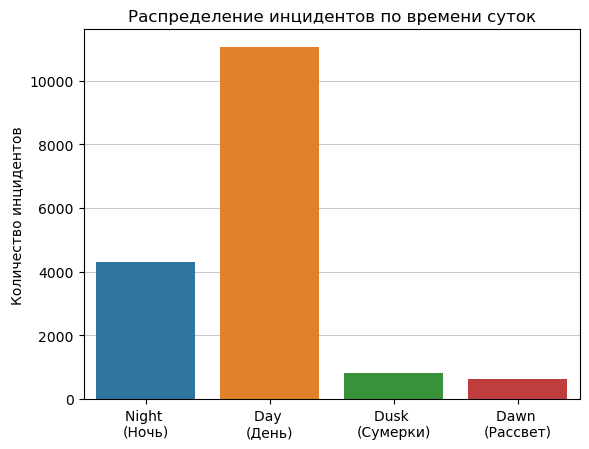

In [21]:
sns.countplot(x='time_of_day',data=df1)
plt.title('Распределение инцидентов по времени суток')
plt.xlabel('')
plt.xticks(ticks=[0,1,2,3], labels=['Night \n(Ночь)','Day \n(День)','Dusk \n(Сумерки)','Dawn \n(Рассвет)'])
plt.ylabel('Количество инцидентов')
plt.grid(axis='y', which='major', linewidth = 0.5) 
plt.gca().set_axisbelow(True) # перемещаем сетку под диаграмму 
plt.show()

In [ ]:
# Здесь и комментировать нечего! 
# Сразу видно, что во время закатов (сумерков) и на рассвете наименьшее количество столкновений. 

In [22]:
df1_heatmap = pd.crosstab(df1['time_of_day'], df1['birds_struck'])

# Изменим порядок столбцов и строк для красоты 
df1_heatmap = df1_heatmap[['0', '1', '2-10', '11-100', 'Over 100']] 

df1_heatmap

birds_struck,0,1,2-10,11-100,Over 100
time_of_day,,,,,
Dawn,0,467,158,8,1
Day,6,8259,2626,157,11
Dusk,0,646,173,13,1
Night,0,3654,635,11,2


In [23]:
# Проверим тестом Пирсона (Хи-квадрат) взаимосвязь времени суток и количества столкновений. 
# У этого теста нулевая гипотеза говорит, что между двумя категориальными переменными зависимости нет. 

stats.chi2_contingency(df1_heatmap)

Chi2ContingencyResult(statistic=208.01119036929174, pvalue=7.214832241696867e-38, dof=12, expected_freq=array([[2.26051818e-01, 4.90758498e+02, 1.35329689e+02, 7.12063228e+00,
        5.65129546e-01],
       [3.94307107e+00, 8.56040730e+03, 2.36058522e+03, 1.24206739e+02,
        9.85767768e+00],
       [2.97004992e-01, 6.44797837e+02, 1.77806988e+02, 9.35565724e+00,
        7.42512479e-01],
       [1.53387212e+00, 3.33003637e+03, 9.18278108e+02, 4.83169717e+01,
        3.83468029e+00]]))

In [ ]:
# р-значение существенно ниже 5% (...e-38), => данные противоречат нулевой гипотезе и мы можем её отвергнуть. 
# Между временем суток и количеством столкновений есть значимая зависимость. 

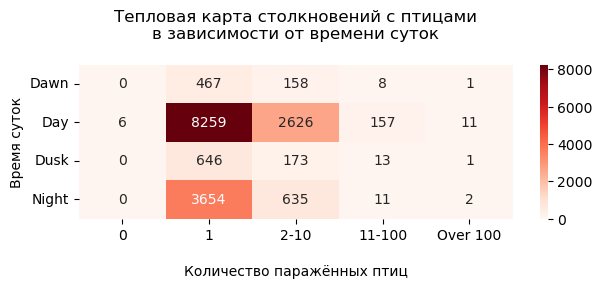

In [26]:
plt.figure(figsize=(7, 2)) 
plt.title('Тепловая карта столкновений с птицами' + '\n' + 
          'в зависимости от времени суток' + '\n') 
sns.heatmap(
    df1_heatmap,
    cmap='Reds', # Задаём цветовую схему (https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html)
    annot=True, # Включаем отображение значений внутри ячеек. 
    fmt='.5g', # Количество знаков. 
)
plt.xlabel('\n'+'Количество паражённых птиц') 
plt.ylabel('Время суток') 
plt.yticks(rotation=0)
plt.show()


In [27]:
df1_temp = df1_heatmap[['1', '2-10', '11-100', 'Over 100']]
print(df1_temp.sum(axis = 0), '\n')
print(df1_temp.sum(axis = 1), '\n')

birds_struck
1           13026
2-10         3592
11-100        189
Over 100       15
dtype: int64 

time_of_day
Dawn       634
Day      11053
Dusk       833
Night     4302
dtype: int64 



    По тепловой карте можно сделать выводы: 
1. В дневное время произошло больше всего столкновений: 11053.
2. Второе опасное время суток - ночь: 4302 столкновения.
3. На рассвете произошло 634 столкновения.
4. На закате (в суммерках) произошло 833 столкновения.
5. В основном в столкновения попадают одиночные птицы: 13026. 
6. Столкновения с двумя и более (до 10) птицами произошло в 3592 случаях. 
7. Случаи столкновения со стаями от 11 до 100 особей - 189, более 100 особей - 15. 

Вывод по части "а1": 
Дневное и ночное время - самые опасные для полётов с точки зрения вероятного столкновения с птицами. 
Лучше выбирать для полётов рассветы и закаты. 


#### а2) Между переменными state (штат) и birds_struck (количество пораженных птиц) существует взаимосвязь. Тестирование гипотезы о взаимосвязи столкновений птиц с самолётами и наличием крупных свалок в штате.  

In [27]:
# а2) df2
df2 = df[['state', 'birds_struck']]

# Удаляем строки с пропусками 
df2 = df2.dropna()
df2.isna().sum() 

state           0
birds_struck    0
dtype: int64

In [ ]:
# Сразу начнём с проверки взаимосвязи переменных тестом Пирсона. 

In [28]:
df2_heatmap = pd.crosstab(df2['state'], df2['birds_struck']) 
df2_heatmap = df2_heatmap[['0', '1', '2-10', '11-100', 'Over 100']] 
df2_heatmap 

birds_struck,0,1,2-10,11-100,Over 100
state,,,,,
AB,0,6,3,0,0
AK,0,128,30,1,0
AL,0,187,64,1,0
AR,0,87,25,1,0
AZ,0,115,11,0,0
BC,0,11,2,0,0
CA,0,1304,419,22,2
CO,0,189,48,0,0
CT,0,193,79,6,0


In [101]:
stats.chi2_contingency(df2_heatmap)

Chi2ContingencyResult(statistic=420.5526507341789, pvalue=1.3638457729234137e-13, dof=228, expected_freq=array([[3.01003344e-03, 7.01387960e+00, 1.87123746e+00, 1.03344482e-01,
        8.52842809e-03],
       [5.31772575e-02, 1.23911873e+02, 3.30585284e+01, 1.82575251e+00,
        1.50668896e-01],
       [8.42809365e-02, 1.96388629e+02, 5.23946488e+01, 2.89364548e+00,
        2.38795987e-01],
       [3.77926421e-02, 8.80631550e+01, 2.34944259e+01, 1.29754738e+00,
        1.07079153e-01],
       [4.21404682e-02, 9.81943144e+01, 2.61973244e+01, 1.44682274e+00,
        1.19397993e-01],
       [4.34782609e-03, 1.01311594e+01, 2.70289855e+00, 1.49275362e-01,
        1.23188406e-02],
       [5.84280936e-01, 1.36147196e+03, 3.63227982e+02, 2.00603122e+01,
        1.65546265e+00],
       [7.92642140e-02, 1.84698829e+02, 4.92759197e+01, 2.72140468e+00,
        2.24581940e-01],
       [9.29765886e-02, 2.16650948e+02, 5.78004459e+01, 3.19219621e+00,
        2.63433668e-01],
       [1.60869565e-01

In [ ]:
# р-значение существенно ниже 5% (...e-13), следовательно, данные противоречат нулевой гипотезе. 
# Следовательно, между штатом и количеством столкновений есть значимая зависимость, будем анализировать дальше! 


In [29]:
# Посчитаем количество поражённых птиц для каждого штата. 
# Используем указанный выше метод замены категориальных значений на количество поражённых птиц. 

df2['birds_struck'] = df2['birds_struck'].replace(
    to_replace = ['0','1','2-10','11-100','Over 100'],
    value = [0, 1, 5, 50, 100]
)
df2.head(5)

,state,birds_struck
0,IL,1
1,MD,5
2,TN,1
3,VA,1
4,SC,1


In [30]:
df2 = (df2 
    .groupby(['state'])['birds_struck'].sum() # Группируем штаты и считаем сумму поражённых птиц
    .sort_values(ascending=False) # Сортируем по убыванию значений 
).reset_index()

df2.head(10)

,state,birds_struck
0,CA,4699
1,FL,4221
2,NY,3508
3,TX,3111
4,PA,2410
5,IL,2197
6,NJ,1321
7,GA,1316
8,LA,1220
9,OH,1181


In [31]:
# Добавим название для ТОП-10 штатов по количеству инцидентов, для наглядности 

df2['state'] = df2['state'].replace(
    to_replace = ['CA','FL','NY','TX','PA','IL','GA','NJ','LA','OH'],
    value = ['CA (Калифорния)',
             'FL (Флорида)',
             'NY (Нью-Йорк)',
             'TX (Техас)',
             'PA (Пенсильвания) ',
             'IL (Иллинойс)',
             'GA (Джорджия)',
             'NJ (Нью-Джерси)',
             'LA (Луизиана)',
             'OH (Огайо)']
)

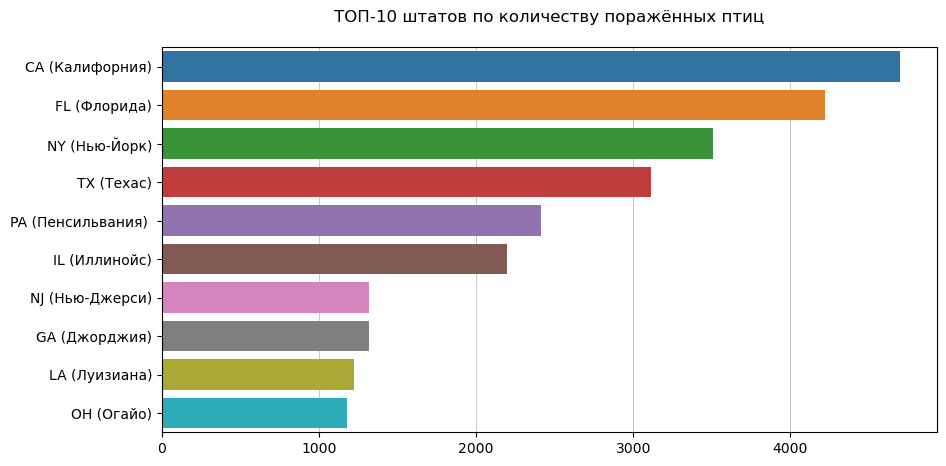

In [32]:
# Нарисуем диаграмму 

plt.figure(figsize=(10, 5)) 
sns.barplot(x='birds_struck', y='state', data=df2.head(10)) 
plt.title('ТОП-10 штатов по количеству поражённых птиц' + '\n')
plt.xlabel(None)
plt.ylabel(None)
plt.grid(axis='x', which='major', linewidth = 0.5) 
plt.gca().set_axisbelow(True) # перемещаем сетку под диаграмму 

plt.show()

    Вот такая диаграмма получилась! 

Вспомним, что датасет у нас за период с 1990 по 1997 год (+ в датасете есть некоторые данные за 1998-1999 г.). 
Поиск в Яндексе выдал нам результат в 2024 году: 
 1. Свалка Apex Regional в окрестностях Лас-Вегаса, Невада, США, считается самой большой свалкой в стране. 
 2. Ранее крупнейшей свалкой в США была Пуэнте-Хиллз в Калифорнии. 
 3. Также до начала 2000-х годов самой большой в мире считалась свалка Freshkills в Нью-Йорке. 

Калифорния и Нью-Йорк входят у нас в ТОП-3 по количеству поражённых птиц. 


    На основании этих данных, можно сделать вывод по части "а2": 
Гипотеза о взаимосвязи столкновений с птицами и наличием большой свалки в штате подтверждена! 

Свалки - это главная причина столкновений птиц с самолётами! 
Конечно, надо ещё проанализировать расстояние от места столкновения до свалок, площадь этих свалок и полигонов в 1990-х годах, учесть количество рейсов, но у нас нет этих данных. Могу предположить, что этот датасет немного почистили, кое-что вырезали, чтобы анализ не выдал правильный результат и основная причина столкновений не нашлась. 


#### б) Между переменными birds_struck (количество пораженных птиц) и date (дата столкновения) существует взаимосвязь. Во время сезонов перелётов птиц количество столкновений увеличивается. 

In [37]:
# б) df3
df3 = df[['date', 'birds_struck']]

# Удаляем строки с пропусками 
df3 = df3.dropna()
df3.isna().sum() 

date            0
birds_struck    0
dtype: int64

In [38]:
# Проверяем тип. Столбец date имеет тип object. 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18807 entries, 0 to 19301
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          18807 non-null  object
 1   birds_struck  18807 non-null  object
dtypes: object(2)
memory usage: 440.8+ KB


In [39]:
# Преобразовываем в формат даты 
df3['date'] = pd.to_datetime(df3['date']) 
df3.head(10) 

,date,birds_struck
0,1990-09-30,1
1,1993-11-29,2-10
2,1993-08-13,1
3,1993-10-07,1
4,1993-09-25,1
5,1993-09-20,1
6,1993-08-30,1
7,1991-02-14,2-10
8,1992-05-28,1
9,1992-02-29,1


In [42]:
# Меняем категориальные значения переменной birds_struck на количество поражённых птиц, 
# используя указанный выше метод замены. 

df3['birds_struck'] = df3['birds_struck'].replace(
    to_replace = ['0','1','2-10','11-100','Over 100'],
    value = [0, 1, 5, 50, 100]
)
df3.head(5)

,date,birds_struck
0,1990-09-30,1
1,1993-11-29,5
2,1993-08-13,1
3,1993-10-07,1
4,1993-09-25,1


In [44]:
# Группируем данные по датам. Агрегируем birds_struck и считаем сумму поражённых птиц 
df3 = df3.groupby('date').agg({'birds_struck':'sum'})
df3.head(5)

,birds_struck
date,
1990-01-08,5
1990-01-11,5
1990-01-19,5
1990-02-22,6
1990-02-24,5


In [45]:
# Cуммируем значения за каждый месяц 
df3_month = df3.resample('M').sum() 
df3_month

,birds_struck
date,
1990-01-31,15
1990-02-28,13
1990-03-31,16
1990-04-30,113
1990-05-31,382
1990-06-30,198
1990-07-31,433
1990-08-31,485
1990-09-30,666


In [46]:
# Добавляем столбцы year и month, они нам будут нужны 
df3_month['year'] = df3_month.index.year
df3_month['month'] = df3_month.index.month 

# Заменим номера месяцев названиями 
df3_month['month'] = df3_month['month'].replace(
    to_replace = [1,2,3,4,5,6,7,8,9,10,11,12],
    value = ['январь','февраль','март','апрель','май','июнь',
             'июль','август','сентябрь','октябрь','ноябрь','декабрь']
)
# Получилось то, что нам надо 
df3_month

,birds_struck,year,month
date,,,
1990-01-31,15,1990,январь
1990-02-28,13,1990,февраль
1990-03-31,16,1990,март
1990-04-30,113,1990,апрель
1990-05-31,382,1990,май
1990-06-30,198,1990,июнь
1990-07-31,433,1990,июль
1990-08-31,485,1990,август
1990-09-30,666,1990,сентябрь


In [48]:
# Данные подготовили, тестируем гипотезу о нормальности распределения количества столкновений 

stats.shapiro(df3_month['birds_struck'])

ShapiroResult(statistic=0.9555603265762329, pvalue=0.0006391593487933278)

In [ ]:
# Нулевая гипотеза - данные распределены нормально. 
# p-значение менее 5%, распределение нельзя считать нормальным, нулевая гипотеза отвергается. 
# => результаты ANOVA-теста не будут валидными, нужно использовать тест Краскела-Уоллеса. 

In [49]:
# Тест Краскела-Уоллиса 

m01 = df3_month.loc[df3_month['month'] == 'январь', 'birds_struck'].values
m02 = df3_month.loc[df3_month['month'] == 'февраль', 'birds_struck'].values
m03 = df3_month.loc[df3_month['month'] == 'март', 'birds_struck'].values
m04 = df3_month.loc[df3_month['month'] == 'апрель', 'birds_struck'].values
m05 = df3_month.loc[df3_month['month'] == 'май', 'birds_struck'].values
m06 = df3_month.loc[df3_month['month'] == 'июнь', 'birds_struck'].values
m07 = df3_month.loc[df3_month['month'] == 'июль', 'birds_struck'].values
m08 = df3_month.loc[df3_month['month'] == 'август', 'birds_struck'].values
m09 = df3_month.loc[df3_month['month'] == 'сентябрь', 'birds_struck'].values
m10 = df3_month.loc[df3_month['month'] == 'октябрь', 'birds_struck'].values
m11 = df3_month.loc[df3_month['month'] == 'ноябрь', 'birds_struck'].values
m12 = df3_month.loc[df3_month['month'] == 'декабрь', 'birds_struck'].values

stats.kruskal(m01, m02, m03, m04, m05, m06, m07, m08, m09, m10, m11, m12) 

KruskalResult(statistic=46.81339364301388, pvalue=2.3208778908984645e-06)

In [ ]:
# Нулевая гипотеза - медианное значение количества столкновений между месяцами не отличается. 
# р-значение меньше 5% (...e-08) => данные противоречат нулевой гипотезе. 
# => нулевая гипотеза отвергается, месяцы сильно отличаются по количеству столкновений. 

# Следовательно, можно рассмотреть влияние сезонов перелётов птиц на количество столкновений с самолётами. 

# Нарисуем для наглядности диаграммы распределений столкновений по годам и месяцам. 


In [50]:
df3_month['birds_struck'].max()

1022

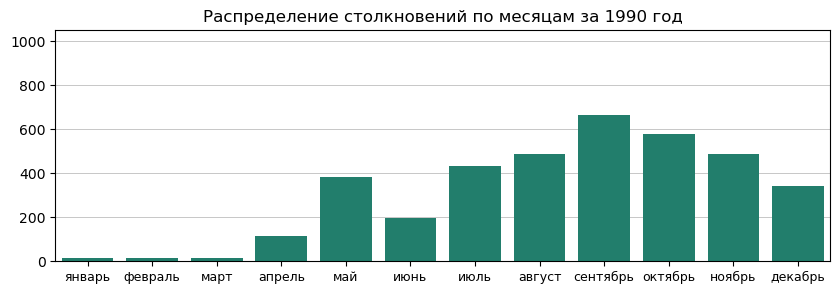

In [63]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'month', y = 'birds_struck', data = df3_month[df3_month['year'] == 1990], color='#138D75')
plt.title('Распределение столкновений по месяцам за 1990 год')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1050)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

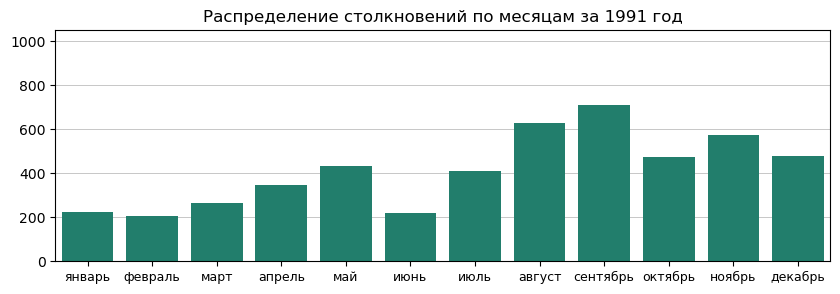

In [64]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'month', y = 'birds_struck', data = df3_month[df3_month['year'] == 1991], color='#138D75')
plt.title('Распределение столкновений по месяцам за 1991 год')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1050)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

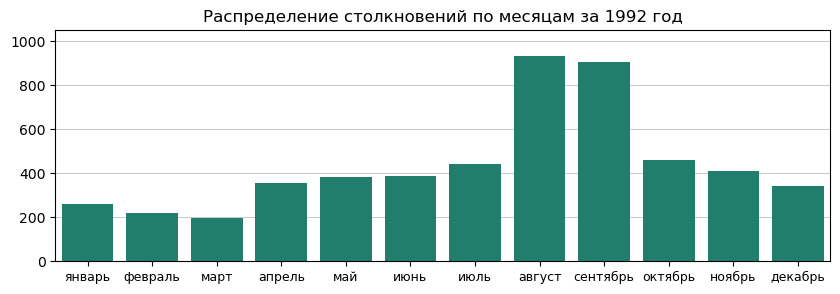

In [65]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'month', y = 'birds_struck', data = df3_month[df3_month['year'] == 1992], color='#138D75')
plt.title('Распределение столкновений по месяцам за 1992 год')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1050)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

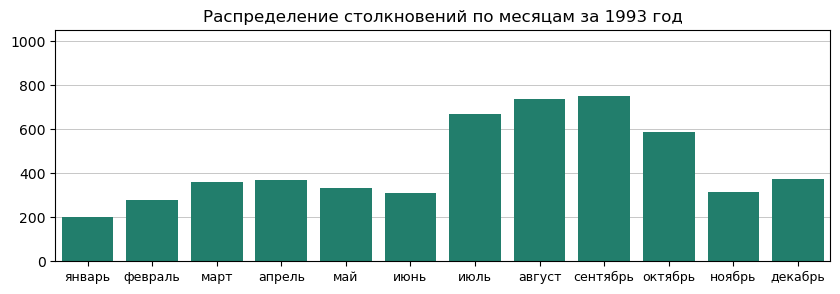

In [66]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'month', y = 'birds_struck', data = df3_month[df3_month['year'] == 1993], color='#138D75')
plt.title('Распределение столкновений по месяцам за 1993 год')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1050)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

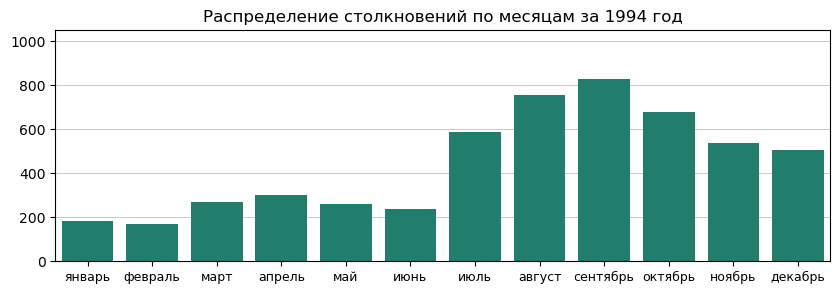

In [67]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'month', y = 'birds_struck', data = df3_month[df3_month['year'] == 1994], color='#138D75')
plt.title('Распределение столкновений по месяцам за 1994 год')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1050)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

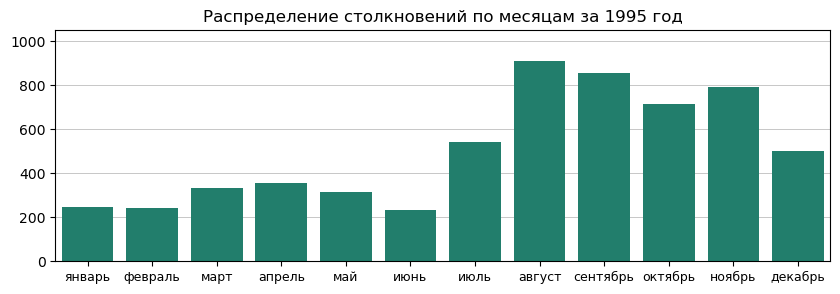

In [68]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'month', y = 'birds_struck', data = df3_month[df3_month['year'] == 1995], color='#138D75')
plt.title('Распределение столкновений по месяцам за 1995 год')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1050)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

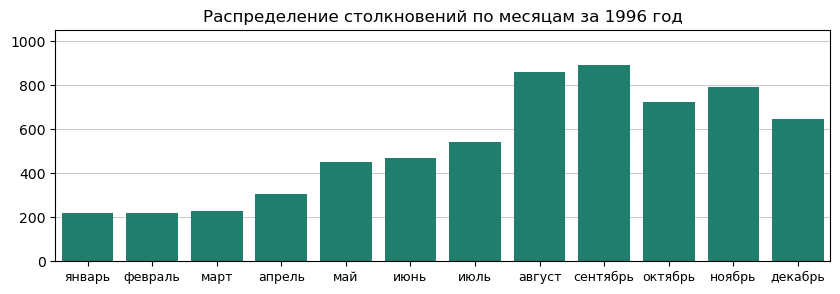

In [69]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'month', y = 'birds_struck', data = df3_month[df3_month['year'] == 1996], color='#138D75')
plt.title('Распределение столкновений по месяцам за 1996 год')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1050)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

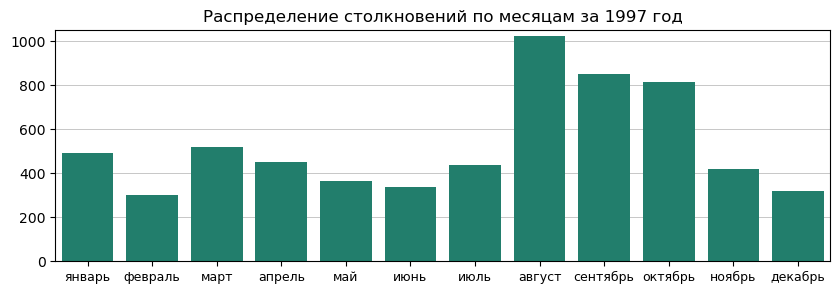

In [70]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'month', y = 'birds_struck', data = df3_month[df3_month['year'] == 1997], color='#138D75')
plt.title('Распределение столкновений по месяцам за 1997 год')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1050)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

    За 1998-1999 годы гистограммы строить не будем, т.к. в описании датасета указано, что данные о столкновениях представлены за период с 1990 по 1997 годы. Но я, конечно, проверил, в 1998-1999 годах количество столкновений в датасете уменьшалось. Возможно это связано с тем, что фиксация таких происшествий стала необязательной, а возможно к 1997 году выявили взаимосвязь с полигонами отходов и исследование проблемы прекратилось. 
    Cвалка Freshkills в Нью-Йорке была закрыта в 2001 году. К 1997 году две из четырёх куч мусора на свалке были закрыты и покрыты толстым водонепроницаемым слоем (https://en.wikipedia.org/wiki/Fresh_Kills_Landfill). 

    Но вернёмся к нашим диаграммам. 
    На диаграммах наблюдается закономерность: ежегодно в период с августа по ноябрь было максимальное количество столкновений с птицами. Почему именно в эти месяцы были пики? 

    Поиск информации в Интернете о перелётах птиц даёт такие ответы: 
1. Птенцы могут лететь на юг, когда период высиживания выпадает на холодный сезон. Тогда их забирают в тёплые края до тех пор, пока они не окрепнут. 
2. Осенний отлёт начинается после того, как молодняк научится летать. 
3. Птицы начинают миграцию в августе, самые последние улетают в ноябре. 

Нарисуем ещё пару "сводных" диаграмм. 

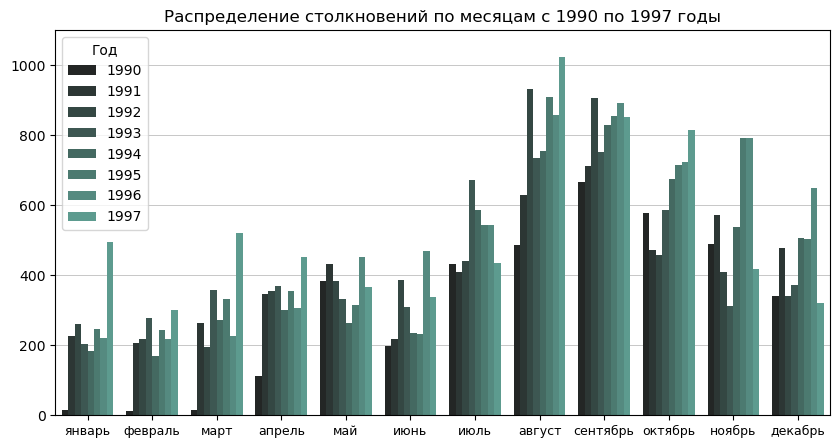

In [71]:
plt.figure(figsize = (10,5))
df3_plot = pd.DataFrame(
    {
        'birds_struck': df3_month[(df3_month['year'] >= 1990) & (df3_month['year'] <= 1997)]['birds_struck'],
        'Год': df3_month[(df3_month['year'] >= 1990) & (df3_month['year'] <= 1997)]['year'],
        'month': df3_month[(df3_month['year'] >= 1990) & (df3_month['year'] <= 1997)]['month'],
    }
)

# Цветовая схема 
color_palette = {
    1990: '#232625', 
    1991: '#2a3835', 
    1992: '#314a45', 
    1993: '#385c55', 
    1994: '#3e6f65', 
    1995: '#458175', 
    1996: '#4c9385', 
    1997: '#53a595'
}

sns.barplot(x='month', y='birds_struck', data=df3_plot, hue='Год', palette=color_palette) 
plt.title('Распределение столкновений по месяцам с 1990 по 1997 годы')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None), plt.ylim(0, 1100)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

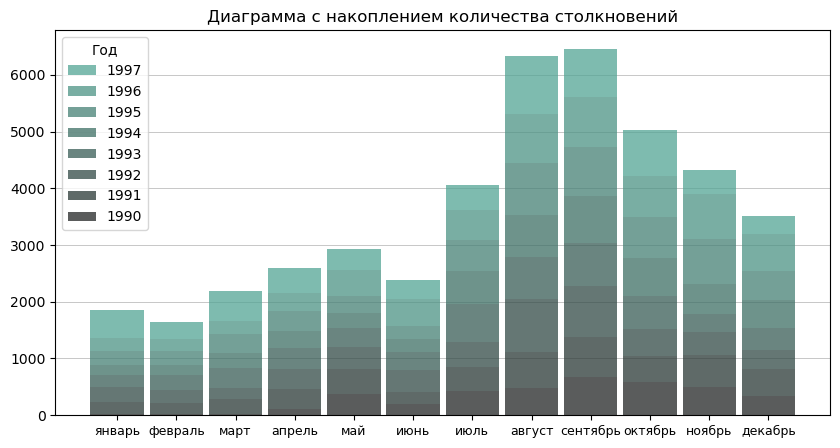

In [73]:
# Необходимо для сортировки годов в обратном порядке, чтобы диаграмма накапливалась 1990 -> 1997 
df3_plot['Год'] = pd.Categorical(df3_plot['Год'], [1997,1996,1995,1994,1993,1992,1991,1990])

plt.figure(figsize = (10,5))
sns.histplot(data=df3_plot, x='month', hue='Год', weights='birds_struck', multiple='stack', 
             palette=color_palette, shrink=0.9, linewidth=0)
plt.title('Диаграмма с накоплением количества столкновений')
plt.xlabel(None), plt.xticks(fontsize=9), plt.ylabel(None)
plt.grid(axis='y', which='major', linewidth = 0.5), plt.gca().set_axisbelow(True)
plt.show()

# Непонятно, почему отличаются оттенки на верхней и нижней диаграммах, если цветовая схема одинаковая. 

    На последней диаграмме также выделяется месяц май - сезон перелёта птиц с юга на север. 

    Вывод по части "б": 
    На количество столкновений влияют сезоны перелётов птиц. Месяцы с наибольшим количеством столкновений: август, сентябрь, октябрь, ноябрь. Наша гипотеза подтверждена! 

Пассажирам лучше не планировать полёты в эти месяцы. Другого практического смысла здесь нет. Птицам лететь на юг не запретишь, расписание не составишь и границы не нарисуешь! 

#### в) Между переменными height (высота над уровнем земли) и birds_struck (количество пораженных птиц) существует взаимосвязь. 

In [16]:
# в) df4
df4 = df[['height', 'birds_struck']]

# Удаляем строки с пропусками 
df4 = df4.dropna()
df4.isna().sum() 

height          0
birds_struck    0
dtype: int64

In [17]:
# Тестирование нормальности распределения переменной высоты 

#print('Средняя: ', df4['height'].mean())
#print('Медиана: ', df4['height'].median())
print('Скошенность: ', stats.skew(df4['height']))
print('Эксцесс: ', stats.kurtosis(df4['height']))

Скошенность:  4.357140039901196
Эксцесс:  28.7156716890766


In [76]:
# Скошенность и эксцесс д.б. близкими к 0, в нашем случае они существенно отличаются от 0. 
# Т.е. распределение высоты нельзя считать нормальным. 

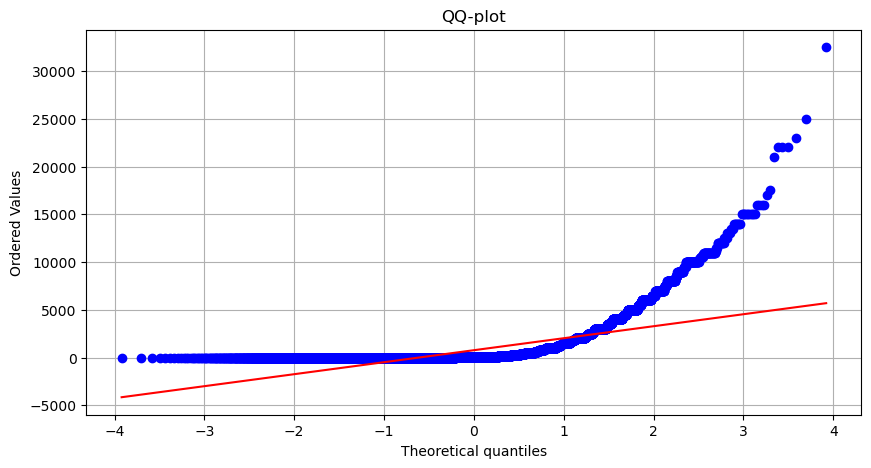

In [18]:
plt.figure(figsize=(10, 5)) 
stats.probplot(df4['height'], dist="norm", plot=plt) 
plt.title('QQ-plot') 
plt.grid(True) 
plt.show() 

# КуКу-плот также показывает, что распределение столкновений по высоте ненормальное. 

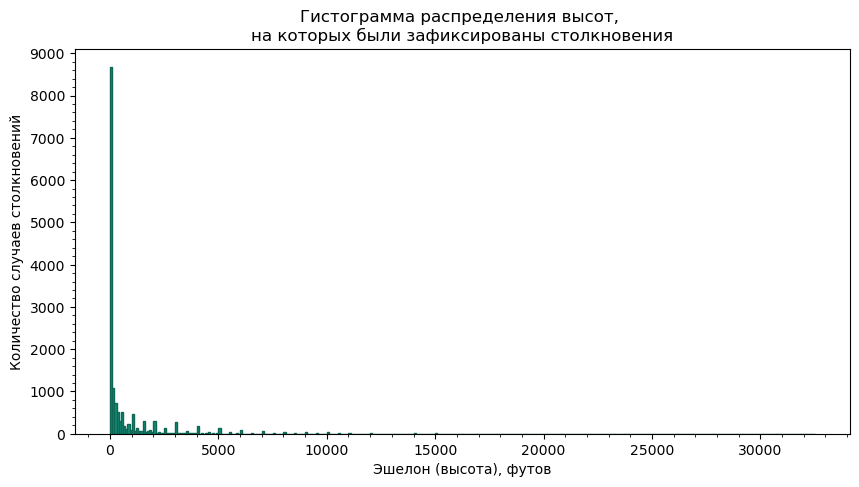

In [71]:
# Построим гистограмму распределения переменной высоты 

plt.figure(figsize=(10, 5)) 
plt.title('Гистограмма распределения высот, \nна которых были зафиксированы столкновения') 

# Вверху блокнота определяли максимальную высота столкновений в нашем датасете: 32500 футов. 
# Поэтому в настройках гистограмы указываем диапазон 0-32500 и 325 ячеек, т.е. один столбик
# у нас будет равен 100 футов (30,48 м.) 

plt.hist(df4['height'], bins=325, range=(0, 32500), color='#138D75', edgecolor = '#0E6655') 

plt.minorticks_on() 
plt.xlabel('Эшелон (высота), футов') 
plt.ylabel('Количество случаев столкновений'), plt.yticks(ticks=range(0,10000,1000)) 
plt.show() 


In [20]:
# Посчитаем доверительный интервал для переменной высоты 

q1 = df4['height'].quantile(0.25)
q3 = df4['height'].quantile(0.75)
iqr = q3 - q1
H_lower_bound = q1 - 1.5*iqr
H_upper_bound = q3 + 1.5*iqr

# т.к. высота не может быть < 0 
if H_lower_bound < 0: H_lower_bound = 0 

print(f'height: {H_lower_bound} - {H_upper_bound} футов ({H_upper_bound*0.3048} м.)') 

height: 0 - 1400.0 футов (426.72 м.)


In [ ]:
# Неожиданно небольшой доверительный интервал получился. 
# Вероятно потому, что распределение переменной высоты ненормальное. 

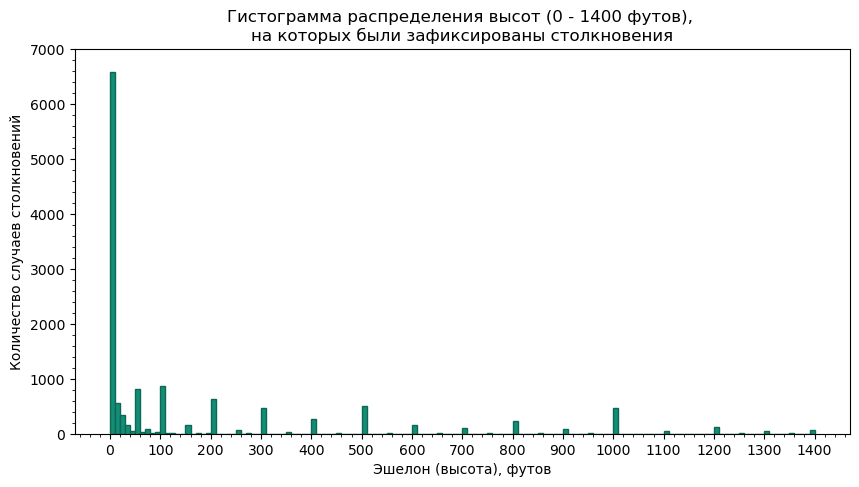

In [72]:
# Построим ещё одну гистограмму распределения высоты, но в диапазоне доверительного интервала 

plt.figure(figsize=(10, 5)) 
plt.title('Гистограмма распределения высот (0 - 1400 футов), \nна которых были зафиксированы столкновения') 

plt.hist(df4['height'], bins=140, range=(0, 1400), color='#138D75', edgecolor = '#0E6655') 
# один столбик равен 10 футов (3,048 м.)

plt.minorticks_on() 
plt.xlabel('Эшелон (высота), футов'), plt.xticks(ticks=range(0,1500,100)) 
plt.ylabel('Количество случаев столкновений'), plt.yticks(ticks=range(0,8000,1000)) 
plt.show() 

In [22]:
# Меняем категориальные значения переменной birds_struck на количество поражённых птиц, 
# используя указанный выше метод замены. 

df4['birds_struck'] = df4['birds_struck'].replace(
    to_replace = ['0','1','2-10','11-100','Over 100'],
    value = [0, 1, 5, 50, 100]
)
df4.head(5)

,height,birds_struck
0,7000.0,1
1,10.0,5
2,400.0,1
3,100.0,1
4,50.0,1


In [23]:
# Посмотрим на сгруппированные высоты  
df4.groupby(['height'])['birds_struck'].sum().reset_index()

,height,birds_struck
0,0.0,17603
1,1.0,87
2,2.0,182
3,3.0,120
4,4.0,45
5,5.0,321
6,6.0,18
7,7.0,135
8,8.0,39
9,9.0,14


    Большое количество столкновений с птицами происходит на нулевой высоте, т.е. во время взлётов/посадок - 17603. 
    Перепроверим полученный результат таким способом: у нас есть переменная phase_of_flt (фаза полёта, во время которой произошло столкновение), сделаем группировку по этой переменной и посчитаем количество поражённых птиц. 

In [24]:
df5 = df[['phase_of_flt', 'birds_struck']]

df5 = df5.dropna()
df5.isna().sum() 

df5['birds_struck'] = df5['birds_struck'].replace(
    to_replace = ['0','1','2-10','11-100','Over 100'],
    value = [0, 1, 5, 50, 100]
)
df5.head(5)


,phase_of_flt,birds_struck
0,Descent,1
1,Climb,5
2,Approach,1
3,Climb,1
4,Climb,1


In [25]:
df5.groupby(['phase_of_flt'])['birds_struck'].sum()

phase_of_flt
Approach        14879
Climb            8674
Descent          1123
En Route          805
Landing Roll     8078
Parked             11
Take-off run     9384
Taxi              110
Name: birds_struck, dtype: int64

    Нас интересуют фазы полёта на нулевой высоте: 

    Taxi (Руление) - 110 
    Take-off run (Разбег при взлёте) - 9384 
    Landing Roll (Приземление) - 8078 

In [26]:
110+9384+8078

17572

    Количество поражённых птиц на нулевой высоте (17603) почти совпадает с количеством поражённых птиц в выбранных фазах полёта (17572). 

In [29]:
# Далее попробуем посчитать количество поражённых птиц по интервалам высот заданной величины. 

# С нулевой высотой всё понятно, её исключаем. 

# Экспериментировал с разными размерами интервалов и максимальными высотами, визуально большой разницы на  
# scatterplot не увидел. Коэф-т Пирсона при этом изменялся в диапазоне: -0.3..-0.44. 

# Остановился на таком варианте: 
# Диапазон переменной высоты: 1-5000 
# Интервалы по 50 футов (15.24 м.) 
# Итого 100 интервалов 

df6 = df4
df6['interval_height'] = pd.cut(df['height'], bins=np.linspace(0, 5000, 101))
df6.head(100)

# [] - включая границу интервала 
# () - НЕ включая границу интервала 

,height,birds_struck,interval_height
0,7000.0,1,NaN
1,10.0,5,"(0.0, 50.0]"
2,400.0,1,"(350.0, 400.0]"
3,100.0,1,"(50.0, 100.0]"
4,50.0,1,"(0.0, 50.0]"
5,0.0,1,NaN
6,4000.0,1,"(3950.0, 4000.0]"
7,100.0,5,"(50.0, 100.0]"
8,200.0,1,"(150.0, 200.0]"
9,3000.0,1,"(2950.0, 3000.0]"


In [30]:
# Удаляем строки с пропусками 
df6 = df6.dropna()

# Группируем интервалы высот и считаем количество поражённых птиц 
df6 = df6.groupby(['interval_height'])['birds_struck'].sum().reset_index()

df6.head(10)

,interval_height,birds_struck
0,"(0.0, 50.0]",7208
1,"(50.0, 100.0]",3419
2,"(100.0, 150.0]",580
3,"(150.0, 200.0]",1812
4,"(200.0, 250.0]",267
5,"(250.0, 300.0]",1002
6,"(300.0, 350.0]",63
7,"(350.0, 400.0]",496
8,"(400.0, 450.0]",28
9,"(450.0, 500.0]",923


In [31]:
# Отключаем вывод предупреждений 
pd.options.mode.copy_on_write = True 

# Извлекаем границы интервалов 
df6['intv_left'] = df6['interval_height'].apply(lambda x: x.left).astype(int)
df6['intv_right'] = df6['interval_height'].apply(lambda x: x.right).astype(int)

# Считаем середину интервалов 
df6['height'] = df6['intv_left']+(df6['intv_right'] - df6['intv_left'])/2


In [32]:
# Наконец-то получилось!!! 
df6.head(10)

,interval_height,birds_struck,intv_left,intv_right,height
0,"(0.0, 50.0]",7208,0,50,25.0
1,"(50.0, 100.0]",3419,50,100,75.0
2,"(100.0, 150.0]",580,100,150,125.0
3,"(150.0, 200.0]",1812,150,200,175.0
4,"(200.0, 250.0]",267,200,250,225.0
5,"(250.0, 300.0]",1002,250,300,275.0
6,"(300.0, 350.0]",63,300,350,325.0
7,"(350.0, 400.0]",496,350,400,375.0
8,"(400.0, 450.0]",28,400,450,425.0
9,"(450.0, 500.0]",923,450,500,475.0


In [ ]:
# Теперь у нас есть две числовые переменные height и birds_struck 

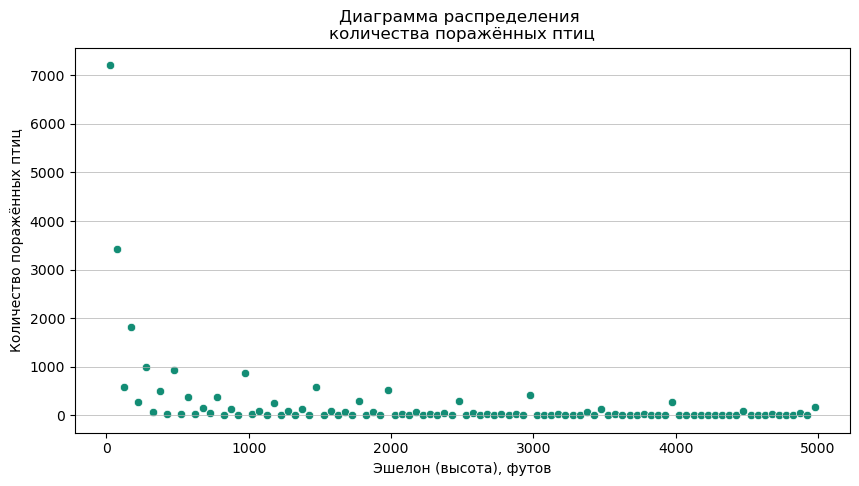

In [73]:
# Нарисуем скатертьплот 

plt.figure(figsize=(10, 5)) 

plt.title('Диаграмма распределения \nколичества поражённых птиц')
sns.scatterplot(data = df6, x = 'height', y = 'birds_struck', color='#138D75') 
plt.xlabel('Эшелон (высота), футов') 
plt.ylabel('Количество поражённых птиц') 
plt.grid(axis='y', which='major', linewidth = 0.5) 

plt.show()

In [ ]:
# По диаграмме видно: чем больше высота, тем меньше столкновений 

In [34]:
# Посчитаем коэф-т корреляции между высотой и количеством столкновений 

print('Коэффициент корреляции Пирсона:', round(df6['height'].corr(df6['birds_struck']), 2))

Коэффициент корреляции Пирсона: -0.35


    Получается, что линейная взаимосвязь между высотой (в диапазоне 1-5000 футов) и количеством поражённых птиц - слабая (модуль = 0.35), но она есть! Гипотезу можно считать доказанной. 

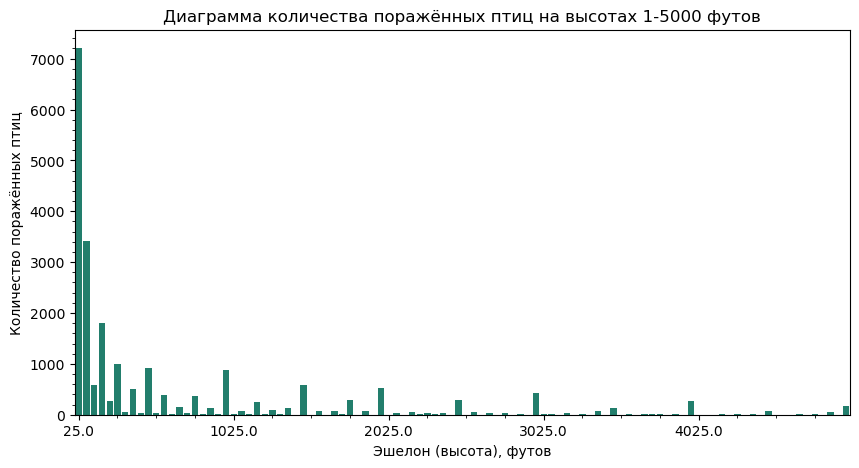

In [74]:
# Построим диаграмму количества поражённых птиц на высотах 1-5000 футов

plt.figure(figsize=(10, 5)) 
plt.title('Диаграмма количества поражённых птиц на высотах 1-5000 футов') 

sns.barplot(x = 'height', y = 'birds_struck', data = df6, color='#138D75')

plt.minorticks_on() 
plt.xlabel('Эшелон (высота), футов'), plt.xticks(ticks=range(0,100,20)) 
plt.ylabel('Количество поражённых птиц'), plt.yticks(ticks=range(0,8000,1000)) 
plt.show() 


    Здесь необходимо вернуться к фазам полёта. Это само-собой напрашивается. 

In [37]:
df5.groupby(['phase_of_flt'])['birds_struck'].sum()

phase_of_flt
Approach        14879
Climb            8674
Descent          1123
En Route          805
Landing Roll     8078
Parked             11
Take-off run     9384
Taxi              110
Name: birds_struck, dtype: int64

    Обратим внимание на следующие фазы с большим количеством поражённых птиц: 
    Approach (Заход на посадку) - 14879 
    Climb (Набор высоты) - 8674 


In [38]:
# Посчитаем для каждой фазы минимальную и максимальную высоты 

Approach_min = int(df[df['phase_of_flt'] == 'Approach']['height'].min())
Approach_max = int(df[df['phase_of_flt'] == 'Approach']['height'].max())
Climb_min = int(df[df['phase_of_flt'] == 'Climb']['height'].min())
Climb_max = int(df[df['phase_of_flt'] == 'Climb']['height'].max())

print(f'Approach (Заход на посадку): {Approach_min} - {Approach_max} футов (\033[1m{int(Approach_max*0.3048)} м.\033[0m).')
print(f'Climb (Набор высоты): {Climb_min} - {Climb_max} футов (\033[1m{int(Climb_max*0.3048)} м.\033[0m).')

Approach (Заход на посадку): 1 - 15000 футов (4572 м.).
Climb (Набор высоты): 1 - 17500 футов (5334 м.).


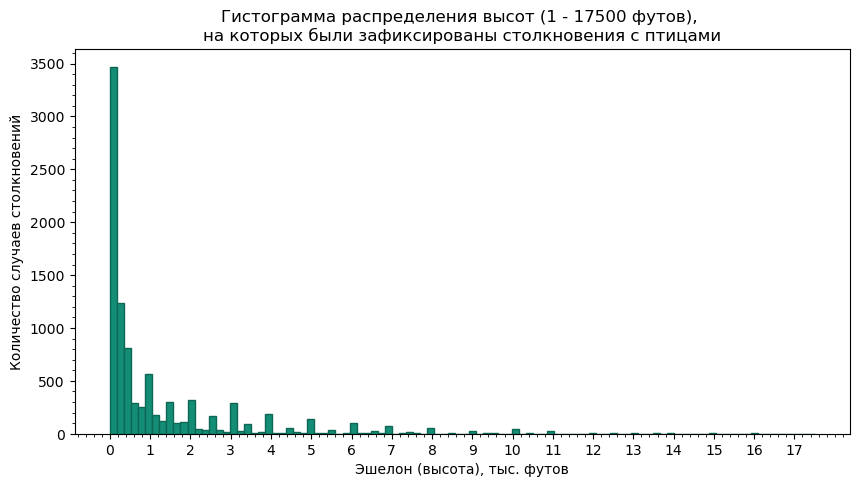

In [75]:
# Построим ещё одну гистограмму 1-17500 футов 

plt.figure(figsize=(10, 5)) 
plt.title('Гистограмма распределения высот (1 - 17500 футов), \nна которых были зафиксированы столкновения с птицами') 

plt.hist(df4['height'], bins=100, range=(1, 17500), color='#138D75', edgecolor = '#0E6655') 

plt.minorticks_on() 
plt.xlabel('Эшелон (высота), тыс. футов'), plt.xticks(ticks=range(0,18000,1000), labels=range(0,18,1)) 
plt.ylabel('Количество случаев столкновений') 
plt.show() 

    Можно сделать выводы по части "в": 
    
1. Количество столкновений с птицами зависит от высоты полёта. 
2. Наибольшее количество столкновений происходит на нулевой высоте в фазах полёта: 
    Take-off run (Разбег при взлете); 
    Landing Roll (Приземление). 
3. С увеличением высоты количество столкновений уменьшается. 
4. Самые опасные высоты получаются примерно в диапазоне доверительно интервала переменной height (до 1400.0 футов, 426.72 м.). Но если смотреть по диаграммам, то опасными высотами можно считать: 0-5000 футов (~1500 м.). 

Наша гипотеза подтверждена! 

С практической точки зрения полученные результаты можно учитывать для проведения мероприятий по отпугиванию птиц на территории лётного поля аэродрома. Для этого существует множество различных методов и технических средств. 
Пилотам необходимо быстрее набирать высоту и производить приземление, но они это и так знают. 


Готово! Интересный был датасет. 